In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras import Model, Input
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import zipfile
import matplotlib.pyplot as plt

In [2]:
def build_model(filters, kernel_dims, activation_function):
    model = Sequential()
    # First convolutional block
    model.add(Conv2D(filters[0], kernel_dims, activation=activation_function, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Second convolutional block
    model.add(Conv2D(filters[1], kernel_dims, activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Third convolutional block
    model.add(Conv2D(filters[1], kernel_dims, activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Fourth convolutional block
    model.add(Conv2D(filters[1], kernel_dims, activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(1024, activation=activation_function))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Unzipping dataset if not already done
dataset_zip_path = "shoes.zip"
if not os.path.isdir("shoes"):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall("shoes")


train_data_dir = "shoes/train"
test_data_dir = "shoes/test"

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 224, 224


train_data_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)


test_data_generator = ImageDataGenerator(rescale=1.0 / 255.0)


training_data = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64,
    class_mode='categorical'
)


testing_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64,
    class_mode='categorical'
)


Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)

# Training
history = model.fit(training_data, epochs=40, validation_data=testing_data, callbacks=[early_stopping, reduce_lr])

# Evaluation
test_loss, test_accuracy = model.evaluate(testing_data)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

model.save("shoe_classifier_model.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,211,523 (73.29 MB)

 Trainable params: 19,211,523 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3461 - loss: 0.7634 - val_accuracy: 0.3333 - val_loss: 0.6391 - learning_rate: 0.0010
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - accuracy: 0.3146 - loss: 0.6427 - val_accuracy: 0.3772 - val_loss: 0.6352 - learning_rate: 0.0010
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.3811 - loss: 0.6351 - val_accuracy: 0.3509 - val_loss: 0.6331 - learning_rate: 0.0010
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 315ms/step - accuracy: 0.3615 - loss: 0.6404 - val_accuracy: 0.4474 - val_loss: 0.6289 - learning_rate: 0.0010
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.3759 - loss: 0.6335 - val_accuracy: 0.3947 - val_loss: 0.6230 - learning_rate: 0.0010
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.3885 - loss: 0.6324 - val_accuracy: 0.3333 - val_loss: 0.6438 - learning_rate: 0.0010
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 370ms/step - accuracy: 0.3652 - loss: 0.6325 - val_acc

15
15


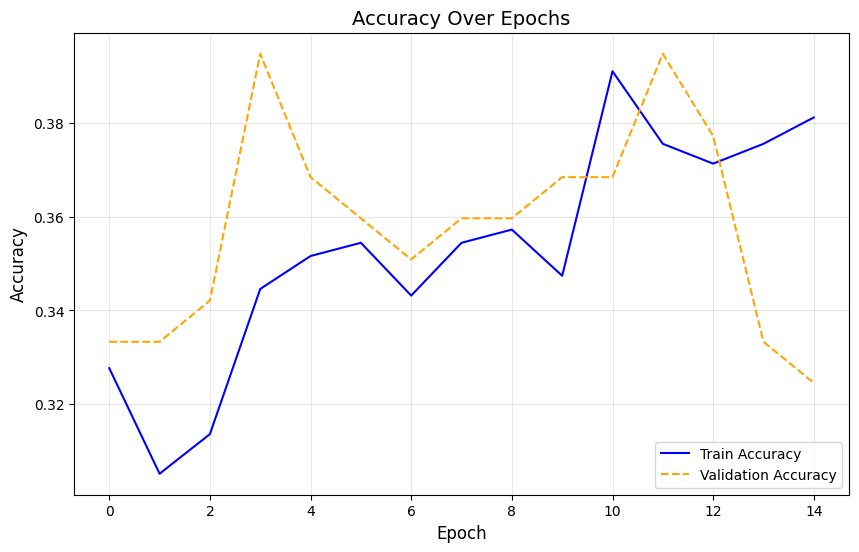

In [31]:
print(len(history.history['accuracy']))
print(len(history.history['val_accuracy']))

# Plot Accuracy
plt.figure(figsize=(10, 6))  # Adjusted figure size for a wider display
plt.plot(history.history['accuracy'][:100], label='Train Accuracy', linestyle='-', color='blue')
plt.plot(history.history['val_accuracy'][:100], label='Validation Accuracy', linestyle='--', color='orange')
plt.xlabel('Epoch', fontsize=12)  # Added font size for labels
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Over Epochs', fontsize=14)  # Slightly changed title wording
plt.legend(loc='best')  # Adjusted legend to pick the optimal location
plt.grid(alpha=0.3)  # Added a light grid for better readability
plt.show()


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)

# Training
history = model.fit(training_data, epochs=100, validation_data=testing_data, callbacks=[early_stopping, reduce_lr])

# Evaluation
test_loss, test_accuracy = model.evaluate(testing_data)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

model.save("shoe_classifier_model.keras")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,211,523 (73.29 MB)

 Trainable params: 19,211,523 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 504ms/step - accuracy: 0.3180 - loss: 0.7749 - val_accuracy: 0.3333 - val_loss: 0.6401 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.3444 - loss: 0.6431 - val_accuracy: 0.3333 - val_loss: 0.6359 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 372ms/step - accuracy: 0.3214 - loss: 0.6387 - val_accuracy: 0.3333 - val_loss: 0.6392 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.3376 - loss: 0.6385 - val_accuracy: 0.3509 - val_loss: 0.6359 - learning_rate: 0.0010
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.3480 - loss: 0.6378
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.3487 - loss: 0.6377 - val_accuracy: 0.3421 - val_loss: 0.6370 - learning_rate: 0.0010
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.3647 - los

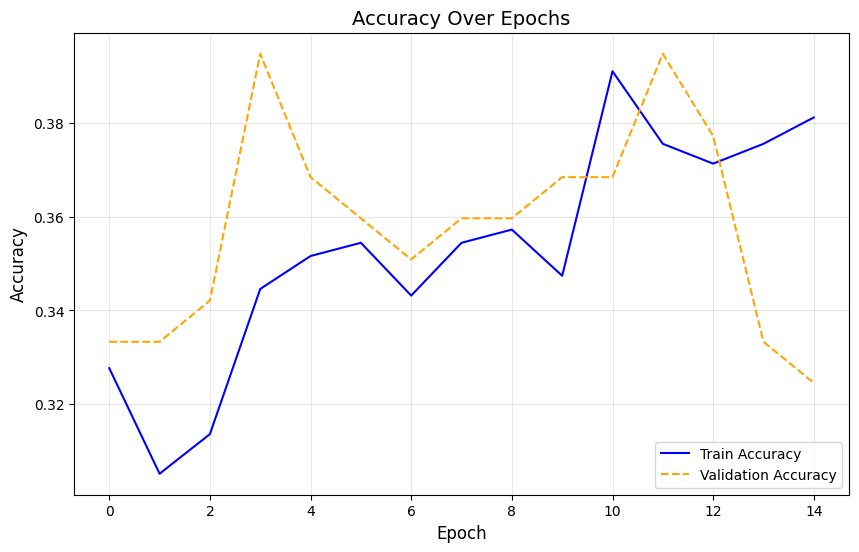

In [29]:
# Plot Accuracy
plt.figure(figsize=(10, 6))  # Adjusted figure size for a wider display
plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='-', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='orange')
plt.xlabel('Epoch', fontsize=12)  # Added font size for labels
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Over Epochs', fontsize=14)  # Slightly changed title wording
plt.legend(loc='best')  # Adjusted legend to pick the optimal location
plt.grid(alpha=0.3)  # Added a light grid for better readability
plt.show()


In [11]:
from tensorflow.keras import backend as K
K.clear_session()


Training with Optimizer: Adam
Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 658ms/step - accuracy: 0.3097 - loss: 1.1063 - val_accuracy: 0.3333 - val_loss: 1.0969 - learning_rate: 0.0010
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.3101 - loss: 1.1039 - val_accuracy: 0.3333 - val_loss: 1.0967 - learning_rate: 0.0010
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.3487 - loss: 1.0996 - val_accuracy: 0.3596 - val_loss: 1.0950 - learning_rate: 0.0010
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.3851 - loss: 1.0918 - val_accuracy: 0.3333 - val_loss: 1.0942 - learning_rate: 0.0010
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.3624 - loss: 1.0943 - val_accuracy: 0.3333 - val_loss: 1.0907 - learning_rate: 0.0010
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.3854 - loss: 1.0907 - val_accuracy: 0.3421 - val_loss: 1.0881 - learning_rate: 0.0010
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - ac

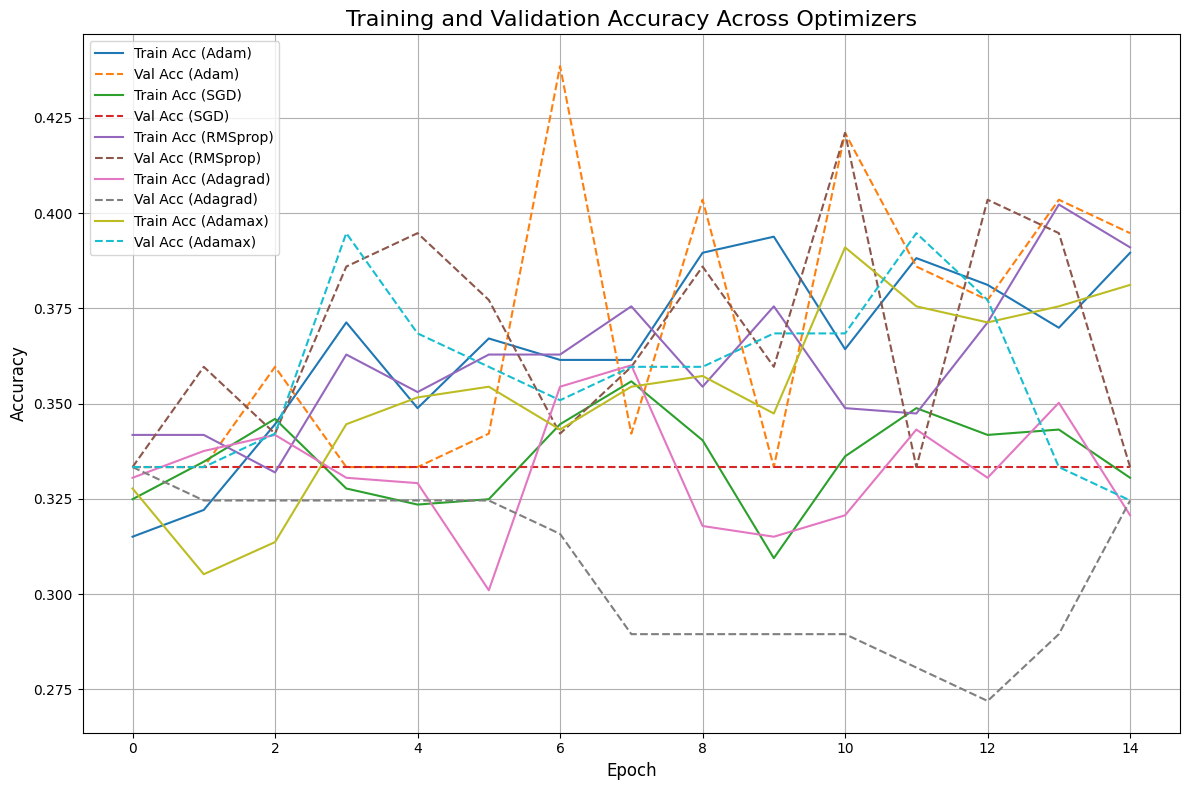

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adamax
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

# Define optimizers to test
optimizers = [Adam, SGD, RMSprop, Adagrad, Adamax]

# Dictionary to store histories
history_dict = {}
# Fixed hyperparameters with reduced complexity
filters = [16, 32]  # Reduced filters
dense_units = 256    # Reduced dense units
IMG_HEIGHT, IMG_WIDTH = 128, 128
learning_rate = 0.001
epochs = 15
batch_size = 8  # Smaller batch size

# Build model function with reduced parameters for memory optimization
def build_model_with_optimizer(optimizer, learning_rate):
    model = Sequential()
    model.add(Conv2D(filters[0], (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters[1], (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Using GlobalAveragePooling instead of Flatten
    model.add(GlobalAveragePooling2D())

    # Add fully connected layer with dropout
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    opt = optimizer(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model for each optimizer
for optimizer in optimizers:
    print(f"\nTraining with Optimizer: {optimizer.__name__}")
    model = build_model_with_optimizer(optimizer, learning_rate)

    # Callback to adjust learning rate dynamically
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=1e-6)

    # Training the model
    history = model.fit(training_data, epochs=epochs, validation_data=testing_data, batch_size=batch_size, callbacks=[reduce_lr])

    # Save training history
    history_dict[optimizer.__name__] = history.history

    # Free GPU memory after training each model
    K.clear_session()

# Plotting accuracy for each optimizer
plt.figure(figsize=(12, 8))
for opt_name, hist in history_dict.items():
    plt.plot(hist['accuracy'], label=f'Train Acc ({opt_name})')
    plt.plot(hist['val_accuracy'], label=f'Val Acc ({opt_name})', linestyle='--')

plt.title("Training and Validation Accuracy Across Optimizers", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()
